In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [2]:
EducationReport = pd.read_excel('/content/Neighborhood_EducationData.xlsx')

In [3]:
SchoolReport = pd.read_excel('/content/Neighbouhood_SchoolEnrollmentData.xlsx')

In [4]:
EducationReport.shape

(14, 10)

In [5]:
SchoolReport.shape

(15, 20)

In [6]:
EducationReport.columns

Index(['DISTRICT', 'Total population 25 years and over',
       'Less than High School ', '% Less than High School ',
       'High School Graduate', '% High School Graduate', 'Some College ',
       '% Some College ', 'Bachelor's Degree or more ',
       '% Bachelors Degree or more '],
      dtype='object')

In [7]:
SchoolReport.columns

Index(['DISTRICT', 'Population Age 3+', 'Enrolled in school:', '% of Age 3+',
       'Enrolled in nursery school, preschool',
       '% of Enrolled in nursery school, preschool',
       'Enrolled in kindergarten', '% of Enrolled in kindergarten',
       'Enrolled in grade 1 to grade 4', '% of Enrolled in grade 1 to grade 4',
       'Enrolled in grade 5 to grade 8', '% of Enrolled in grade 5 to 8',
       'Enrolled in grade 9 to grade 12', '% of Enrolled in grade 9 to 12',
       'Enrolled in college, undergraduate years',
       '% of Enrolled in College, Undergraduate',
       'Graduate or professional school',
       '% of Enrolled in Graduate of Professional School',
       'Not enrolled in school', '% of Total'],
      dtype='object')

In [8]:
null_values_per_column = EducationReport.isnull().sum()
print(null_values_per_column)

DISTRICT                              0
Total population 25 years and over    0
Less than High School                 0
% Less than High School               0
High School Graduate                  0
% High School Graduate                0
Some College                          0
% Some College                        0
Bachelor's Degree or more             0
% Bachelors Degree or more            0
dtype: int64


In [9]:
null_values_per_column = SchoolReport.isnull().sum()
print(null_values_per_column)

DISTRICT                                            0
Population Age 3+                                   0
Enrolled in school:                                 0
% of Age 3+                                         0
Enrolled in nursery school, preschool               0
% of Enrolled in nursery school, preschool          0
Enrolled in kindergarten                            0
% of Enrolled in kindergarten                       0
Enrolled in grade 1 to grade 4                      0
% of Enrolled in grade 1 to grade 4                 0
Enrolled in grade 5 to grade 8                      0
% of Enrolled in grade 5 to 8                       0
Enrolled in grade 9 to grade 12                     0
% of Enrolled in grade 9 to 12                      0
Enrolled in college, undergraduate years            0
% of Enrolled in College, Undergraduate             0
Graduate or professional school                     0
% of Enrolled in Graduate of Professional School    0
Not enrolled in school      

In [10]:
# Merge datasets on the 'Level' column
FullReport = pd.merge(EducationReport, SchoolReport, on='DISTRICT', how='inner')

# Display the merged dataset
FullReport

,DISTRICT,Total population 25 years and over,Less than High School,% Less than High School,High School Graduate,% High School Graduate,Some College,% Some College,Bachelor's Degree or more,% Bachelors Degree or more,...,Enrolled in grade 5 to grade 8,% of Enrolled in grade 5 to 8,Enrolled in grade 9 to grade 12,% of Enrolled in grade 9 to 12,"Enrolled in college, undergraduate years","% of Enrolled in College, Undergraduate",Graduate or professional school,% of Enrolled in Graduate of Professional School,Not enrolled in school,% of Total
0,United States,216271644,27437114,0.126864,59093612,0.273238,62853315,0.290622,66887603,0.309276,...,16495557,0.201776,17001421,0.207964,18697600,0.228712,4150524,0.050770,227589598,0.735723
1,Boston,457113,63725,0.139408,95687,0.209329,81074,0.177361,216627,0.473903,...,22435,0.117305,24627,0.128766,75360,0.394031,29916,0.156420,456720,0.704843
2,D14,35808,3107,0.086768,4549,0.127039,4861,0.135752,23291,0.650441,...,791,0.051444,950,0.061785,7140,0.464360,4950,0.321930,35071,0.695205
3,A15,14496,1432,0.098786,2133,0.147144,1728,0.119205,9203,0.634865,...,557,0.173035,416,0.129233,552,0.171482,512,0.159056,14683,0.820188
4,C11,84021,16446,0.195737,26352,0.313636,19625,0.233573,21598,0.257055,...,6139,0.184576,7120,0.214071,8253,0.248136,1856,0.055803,88170,0.726097
5,A1,12299,2290,0.186194,1199,0.097488,1278,0.103911,7532,0.612408,...,331,0.058305,55,0.009688,3634,0.640127,1143,0.201339,11510,0.669692
6,E18,25738,3032,0.117802,7567,0.294001,7825,0.304025,7314,0.284171,...,2453,0.225667,2151,0.197884,2520,0.231831,741,0.068169,25365,0.700014
7,E13,29652,2329,0.078544,4255,0.143498,3923,0.132301,19145,0.645656,...,1134,0.130781,1590,0.183370,1769,0.204013,1836,0.211740,29149,0.770730
8,B3,17603,3095,0.175822,5997,0.340681,5547,0.315117,2964,0.168380,...,1224,0.183398,1773,0.265658,1199,0.179652,356,0.053341,17923,0.728666
9,B2,32063,7783,0.242741,9394,0.292986,7758,0.241961,7128,0.222312,...,2437,0.142000,2981,0.173698,6222,0.362545,922,0.053723,33782,0.663120


In [11]:
FullReport.columns

Index(['DISTRICT', 'Total population 25 years and over',
       'Less than High School ', '% Less than High School ',
       'High School Graduate', '% High School Graduate', 'Some College ',
       '% Some College ', 'Bachelor's Degree or more ',
       '% Bachelors Degree or more ', 'Population Age 3+',
       'Enrolled in school:', '% of Age 3+',
       'Enrolled in nursery school, preschool',
       '% of Enrolled in nursery school, preschool',
       'Enrolled in kindergarten', '% of Enrolled in kindergarten',
       'Enrolled in grade 1 to grade 4', '% of Enrolled in grade 1 to grade 4',
       'Enrolled in grade 5 to grade 8', '% of Enrolled in grade 5 to 8',
       'Enrolled in grade 9 to grade 12', '% of Enrolled in grade 9 to 12',
       'Enrolled in college, undergraduate years',
       '% of Enrolled in College, Undergraduate',
       'Graduate or professional school',
       '% of Enrolled in Graduate of Professional School',
       'Not enrolled in school', '% of Total'],

In [12]:
# Display basic summary statistics
summary_stats = FullReport.describe(include='all')

# Print the results
print("Summary Statistics:")
summary_stats

Summary Statistics:


,DISTRICT,Total population 25 years and over,Less than High School,% Less than High School,High School Graduate,% High School Graduate,Some College,% Some College,Bachelor's Degree or more,% Bachelors Degree or more,...,Enrolled in grade 5 to grade 8,% of Enrolled in grade 5 to 8,Enrolled in grade 9 to grade 12,% of Enrolled in grade 9 to 12,"Enrolled in college, undergraduate years","% of Enrolled in College, Undergraduate",Graduate or professional school,% of Enrolled in Graduate of Professional School,Not enrolled in school,% of Total
count,13,1.300000e+01,1.300000e+01,13.000000,1.300000e+01,13.000000,1.300000e+01,13.000000,1.300000e+01,13.000000,...,1.300000e+01,13.000000,1.300000e+01,13.000000,1.300000e+01,13.000000,1.300000e+01,13.000000,1.300000e+01,13.000000
unique,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.669698e+07,2.119081e+06,0.133554,4.558730e+06,0.208866,4.846055e+06,0.192106,5.173116e+06,0.465474,...,1.272001e+06,0.147278,1.311248e+06,0.156939,1.446771e+06,0.285261,3.228248e+05,0.151775,1.756775e+07,0.739638
std,NaN,5.996484e+07,7.607141e+06,0.051617,1.638571e+07,0.083899,1.742903e+07,0.077702,1.854298e+07,0.188686,...,4.574113e+06,0.052250,4.714315e+06,0.069418,5.183268e+06,0.141683,1.150108e+06,0.096809,6.310382e+07,0.055908
min,NaN,1.229900e+04,1.432000e+03,0.078544,1.199000e+03,0.097488,1.278000e+03,0.103911,2.964000e+03,0.168380,...,3.310000e+02,0.051444,5.500000e+01,0.009688,5.520000e+02,0.169419,3.560000e+02,0.050770,1.151000e+04,0.663120
25%,NaN,2.519100e+04,2.329000e+03,0.092258,4.255000e+03,0.143498,3.831000e+03,0.130711,7.532000e+03,0.284171,...,7.910000e+02,0.117305,9.130000e+02,0.128766,1.373000e+03,0.181609,8.320000e+02,0.055803,2.434000e+04,0.700014
50%,NaN,2.930900e+04,3.032000e+03,0.117802,4.904000e+03,0.194673,5.136000e+03,0.177361,1.698600e+04,0.520980,...,1.224000e+03,0.161507,1.614000e+03,0.173698,2.520000e+03,0.231831,1.329000e+03,0.156420,2.914900e+04,0.728666
75%,NaN,3.580800e+04,7.783000e+03,0.175822,9.394000e+03,0.292986,7.825000e+03,0.241961,2.159800e+04,0.634865,...,2.453000e+03,0.183398,2.981000e+03,0.206420,7.140000e+03,0.362545,1.856000e+03,0.211740,3.507100e+04,0.770730


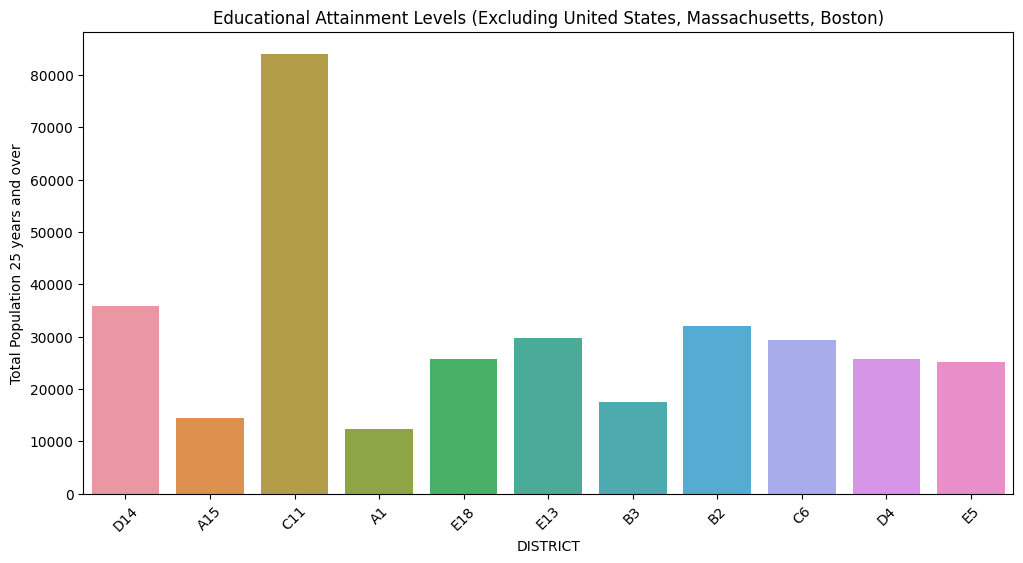

In [13]:
# Exclude 'United States', 'Massachusetts', and 'Boston' levels
filtered_data = FullReport[~FullReport['DISTRICT'].isin(['United States', 'Massachusetts', 'Boston'])]

plt.figure(figsize=(12, 6))
sns.barplot(x='DISTRICT', y='Total population 25 years and over', data=filtered_data)
plt.title('Educational Attainment Levels (Excluding United States, Massachusetts, Boston)')
plt.xlabel('DISTRICT')
plt.ylabel('Total Population 25 years and over')
plt.xticks(rotation=45)
plt.show()

<ipython-input-14-959f6b9bfc43>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20c', len(neighborhoods))


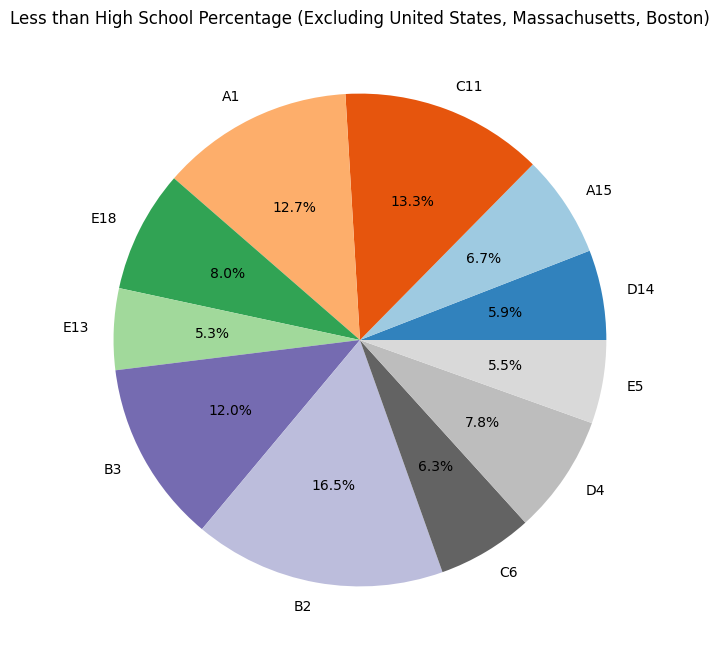

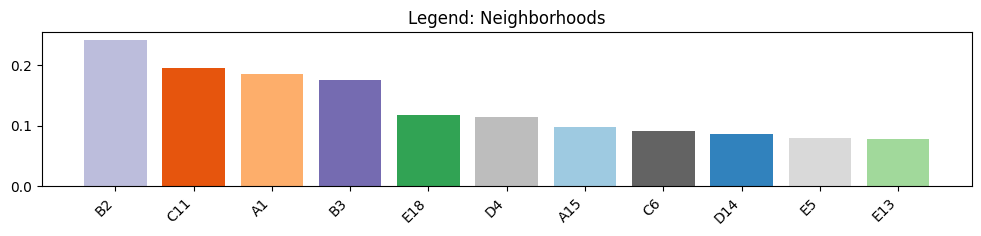

In [14]:
from matplotlib.cm import tab20c

# Filter out United States, Massachusetts, and Boston
filtered_data = FullReport[~FullReport['DISTRICT'].isin(['United States', 'Massachusetts', 'Boston'])]

# Get unique levels (neighborhoods) and assign unique colors
neighborhoods = filtered_data['DISTRICT'].unique()
colors = plt.cm.get_cmap('tab20c', len(neighborhoods))

# Create a color map using the unique colors
color_map = dict(zip(neighborhoods, [colors(i) for i in range(len(neighborhoods))]))

# Extract colors for the filtered data
neighborhood_colors = [color_map[level] for level in filtered_data['DISTRICT']]

# Plot Pie Chart
plt.figure(figsize=(14, 8))
plt.pie(filtered_data['% Less than High School '], labels=filtered_data['DISTRICT'], autopct='%1.1f%%', colors=neighborhood_colors)
plt.title('Less than High School Percentage (Excluding United States, Massachusetts, Boston)')

# Create a custom legend with matching colors
legend_labels = filtered_data[['DISTRICT', '% Less than High School ']]
legend_labels = legend_labels.set_index('DISTRICT').sort_values(by='% Less than High School ', ascending=False)
legend_labels['Color'] = [color_map[level] for level in legend_labels.index]

# Plot Legend
plt.figure(figsize=(12, 2))
plt.xticks(rotation=45, ha='right')
plt.bar(legend_labels.index, legend_labels['% Less than High School '], color=legend_labels['Color'])
plt.title('Legend: Neighborhoods')
plt.show()

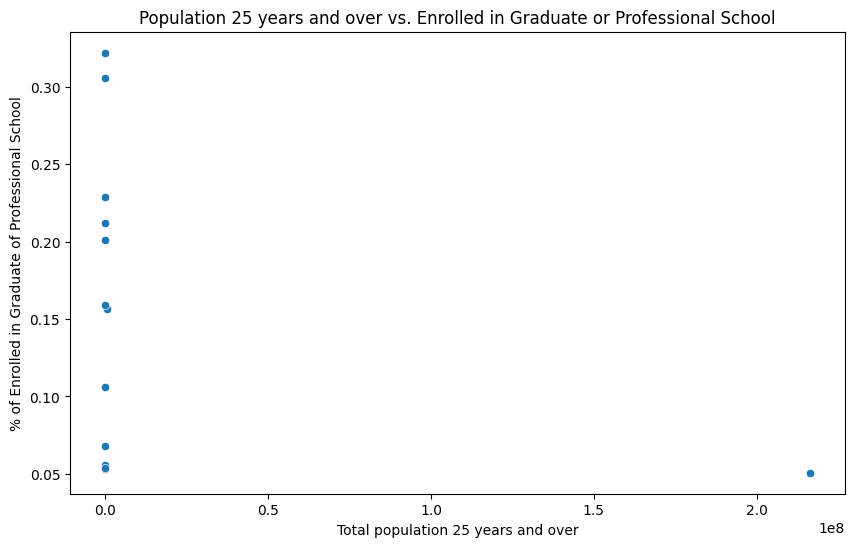

In [15]:
# Scatter Plot - Population 25 years and over vs. Enrolled in Graduate or Professional School:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total population 25 years and over', y='% of Enrolled in Graduate of Professional School', data=FullReport)
plt.title('Population 25 years and over vs. Enrolled in Graduate or Professional School')
plt.xlabel('Total population 25 years and over')
plt.ylabel('% of Enrolled in Graduate of Professional School')
plt.show()

<Figure size 1600x1000 with 0 Axes>

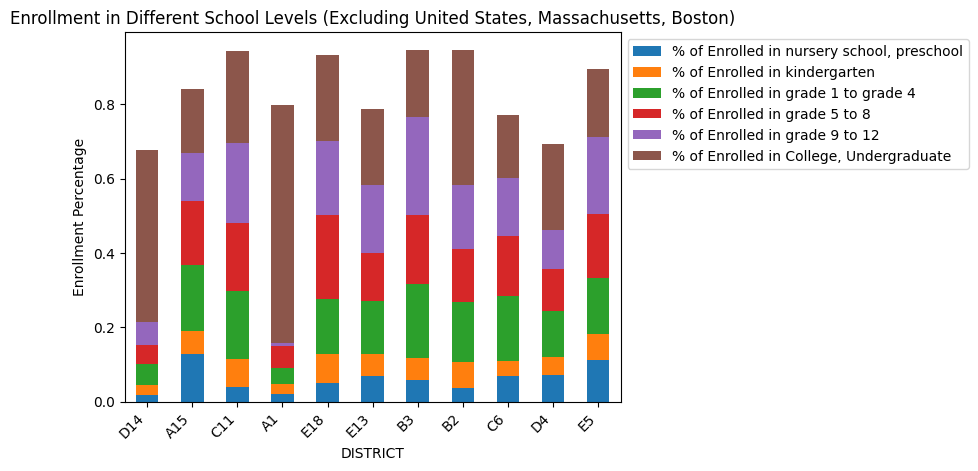

In [16]:
# Increase the length of the chart
plt.figure(figsize=(16, 10))

# Exclude United States, Massachusetts, and Boston
filtered_stacked_data = FullReport[~FullReport['DISTRICT'].isin(['United States', 'Massachusetts', 'Boston'])]
stacked_data_filtered = filtered_stacked_data[['% of Enrolled in nursery school, preschool',
                                               '% of Enrolled in kindergarten',
                                               '% of Enrolled in grade 1 to grade 4',
                                               '% of Enrolled in grade 5 to 8',
                                               '% of Enrolled in grade 9 to 12',
                                               '% of Enrolled in College, Undergraduate']]

ax = stacked_data_filtered.plot(kind='bar', stacked=True)

plt.title('Enrollment in Different School Levels (Excluding United States, Massachusetts, Boston)')
plt.xlabel('DISTRICT')
plt.ylabel('Enrollment Percentage')
plt.xticks(range(len(filtered_stacked_data)), filtered_stacked_data['DISTRICT'], rotation=45, ha='right')

# Shift the legend box to the right
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

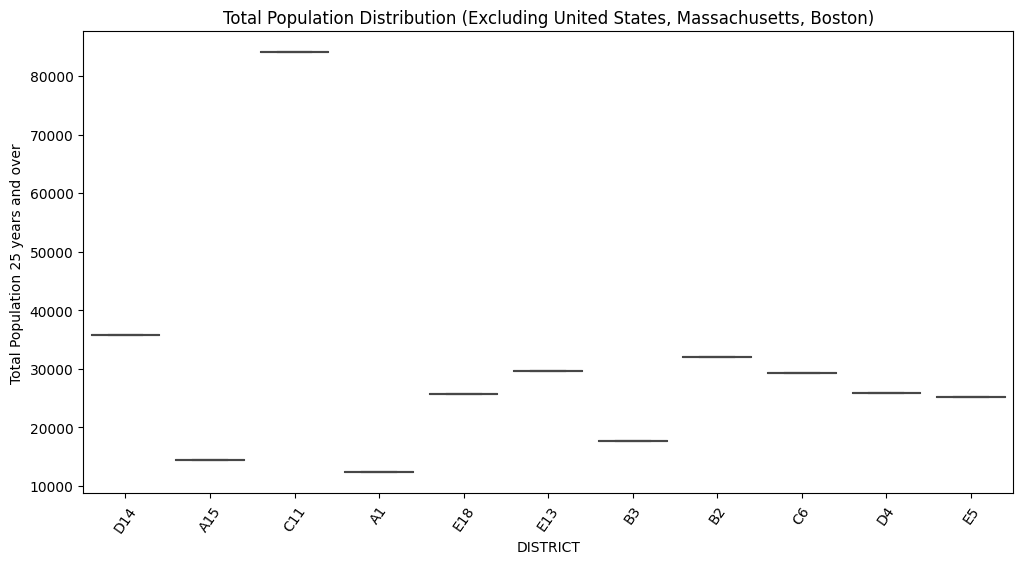

In [17]:
# Exclude United States, Massachusetts, and Boston
filtered_box_data = FullReport[~FullReport['DISTRICT'].isin(['United States', 'Massachusetts', 'Boston'])]

# Box Plot - Total Population Distribution:
plt.figure(figsize=(12, 6))
sns.boxplot(x='DISTRICT', y='Total population 25 years and over', data=filtered_box_data)
plt.title('Total Population Distribution (Excluding United States, Massachusetts, Boston)')
plt.xlabel('DISTRICT')
plt.ylabel('Total Population 25 years and over')
plt.xticks(rotation=55)
plt.show()